## Supervised learning potpourri

## Credit Card Fraund

Credit Card Data:https://www.kaggle.com/mlg-ulb/creditcardfraud

Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
df = pd.read_csv('creditcard.csv') ## Random Forest Classifier Output = Class / Drop Time and Amout for X 

## DATA CLEANING

In [4]:
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df_f= df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Class']]

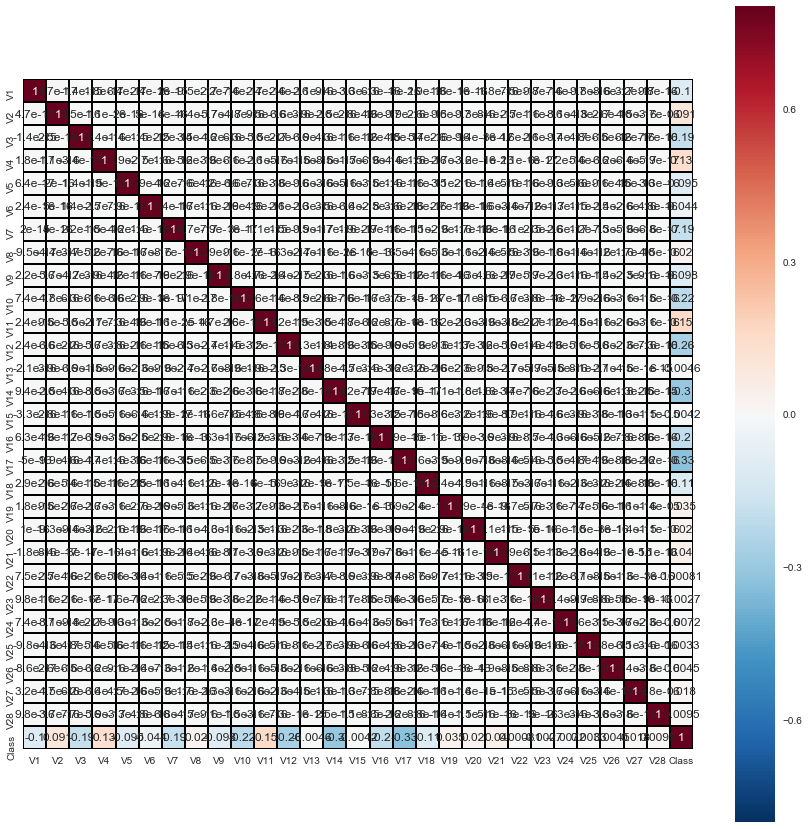

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_f.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

This correlation matrix looks good. 
Because it looks like each feature have no correlation with each other except for with Class. 

## RANDOM FOREST CLASSIFIER

In [22]:
# Run the Random Forest classifier.
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Set the start time for execution speed.
import time
start_time = time.clock() 

rfc = ensemble.RandomForestClassifier(max_depth=10,max_features='auto', n_estimators=100)
X = df_f.loc[:, ~(df_f.columns).isin(['Class'])]
Y = df_f['Class']
#X1 = pd.get_dummies(X1)
#X1 = X1.dropna(axis=1)
rfc.fit(X, Y)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Testing on  Training Set: ' + str(rfc.score(X, Y)))

cv = cross_val_score(rfc, X, Y, cv=10)
print('Scores:', cv)

print('\nAverage score:', cv.mean())

Runtime: 271.13486 seconds
Testing on  Training Set: 0.999719108028
Scores: [ 0.99866582  0.99898181  0.99985956  0.99947333  0.99933289  0.99894663
  0.9997191   0.99954354  0.99947331  0.99933287]

Average score: 0.999332886373


This is predicting well on the data according to the Cross Validation.

In [9]:
df_features = pd.DataFrame(rfc.feature_importances_)
df_features['features']= X.columns
df_features.sort_values(0,ascending = False)


,0,features
0,0.011683,V1
1,0.007158,V2
2,0.005983,V3
3,0.013387,V4
4,0.017999,V5
5,0.002060,V6
6,0.026181,V7
7,0.007559,V8
8,0.035738,V9
9,0.068484,V10


In [13]:
target = df_f['Class']
data = df_f.loc[:, ~(df_f.columns).isin(['Class'])]
y_pred = rfc.predict(data)
score = rfc.score(data, target) 
cross_val = cross_val_score(rfc, data, target, cv=5)

In [21]:
#plt.scatter(target,y_pred)
#plt.show()

In [19]:
#y_pred

In [14]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))

plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))

#print('\nElapsed Time: {:.2f} seconds'.format(time() - start_time))



Number of mislabeled points out of a total 284807 points : 93


,Predict False,Predict True
Actual False,284313,2
Actual True,91,401


False Positives (Type I error): 2 (0.0%)
False Negatives (Type II error): 91 (18.5%)

Score on training set: 99.967%

Cross validation results: 99.926% ± 0.020% 
 
 [ 0.99896422  0.99945578  0.99908709  0.99936799  0.99943821]


Can do feature selection and feature importance to reduce the number of False Negative.
hyper parameters Tuning can also help.    